# House Prices - Advanced Regression Techniques

In [1]:
# check gpu availability
import tensorflow as tf
print(tf.test.is_gpu_available())
print(tf.test.gpu_device_name())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
/device:GPU:0


In [2]:
# Import relevant Python libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

In [3]:
# Load the dataset into a DataFrame and save in a variable
data = pd.read_csv('data\\train.csv')

In [4]:
# Display the first 10 rows of the data
data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [5]:
# Display number of rows, number of columns
data.shape

(1460, 81)

In [6]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# 1. Data Processing 

#### 1.3 Missing Data

##### 1.3.1 Check for missing data

In [8]:
# Display the columns with missing values
data.isnull().sum()[data.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

##### 1.3.2 Handling missing data

In [9]:
# drop the column with missing values more than 45%
data = data.dropna(axis=1, thresh=int(0.55*data.shape[0]))

In [10]:
# display the categorical columns with missing values
data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum() > 0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [11]:
# impute the missing values in the categorical columns with the mode
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [12]:
# show the columns numerical columns with missing values
data.select_dtypes(exclude='object').isnull().sum()[data.select_dtypes(exclude='object').isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
# impute the numerical columns with missing values with the mean
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())

In [14]:
# Display the columns with missing values
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

#### 1.4 Outliers

##### 1.4.1 Identifying Outliers

Id                  Axes(0.125,0.798085;0.133621x0.0819149)
MSSubClass       Axes(0.285345,0.798085;0.133621x0.0819149)
LotFrontage       Axes(0.44569,0.798085;0.133621x0.0819149)
LotArea          Axes(0.606034,0.798085;0.133621x0.0819149)
OverallQual      Axes(0.766379,0.798085;0.133621x0.0819149)
OverallCond         Axes(0.125,0.699787;0.133621x0.0819149)
YearBuilt        Axes(0.285345,0.699787;0.133621x0.0819149)
YearRemodAdd      Axes(0.44569,0.699787;0.133621x0.0819149)
MasVnrArea       Axes(0.606034,0.699787;0.133621x0.0819149)
BsmtFinSF1       Axes(0.766379,0.699787;0.133621x0.0819149)
BsmtFinSF2          Axes(0.125,0.601489;0.133621x0.0819149)
BsmtUnfSF        Axes(0.285345,0.601489;0.133621x0.0819149)
TotalBsmtSF       Axes(0.44569,0.601489;0.133621x0.0819149)
1stFlrSF         Axes(0.606034,0.601489;0.133621x0.0819149)
2ndFlrSF         Axes(0.766379,0.601489;0.133621x0.0819149)
LowQualFinSF        Axes(0.125,0.503191;0.133621x0.0819149)
GrLivArea        Axes(0.285345,0.503191;

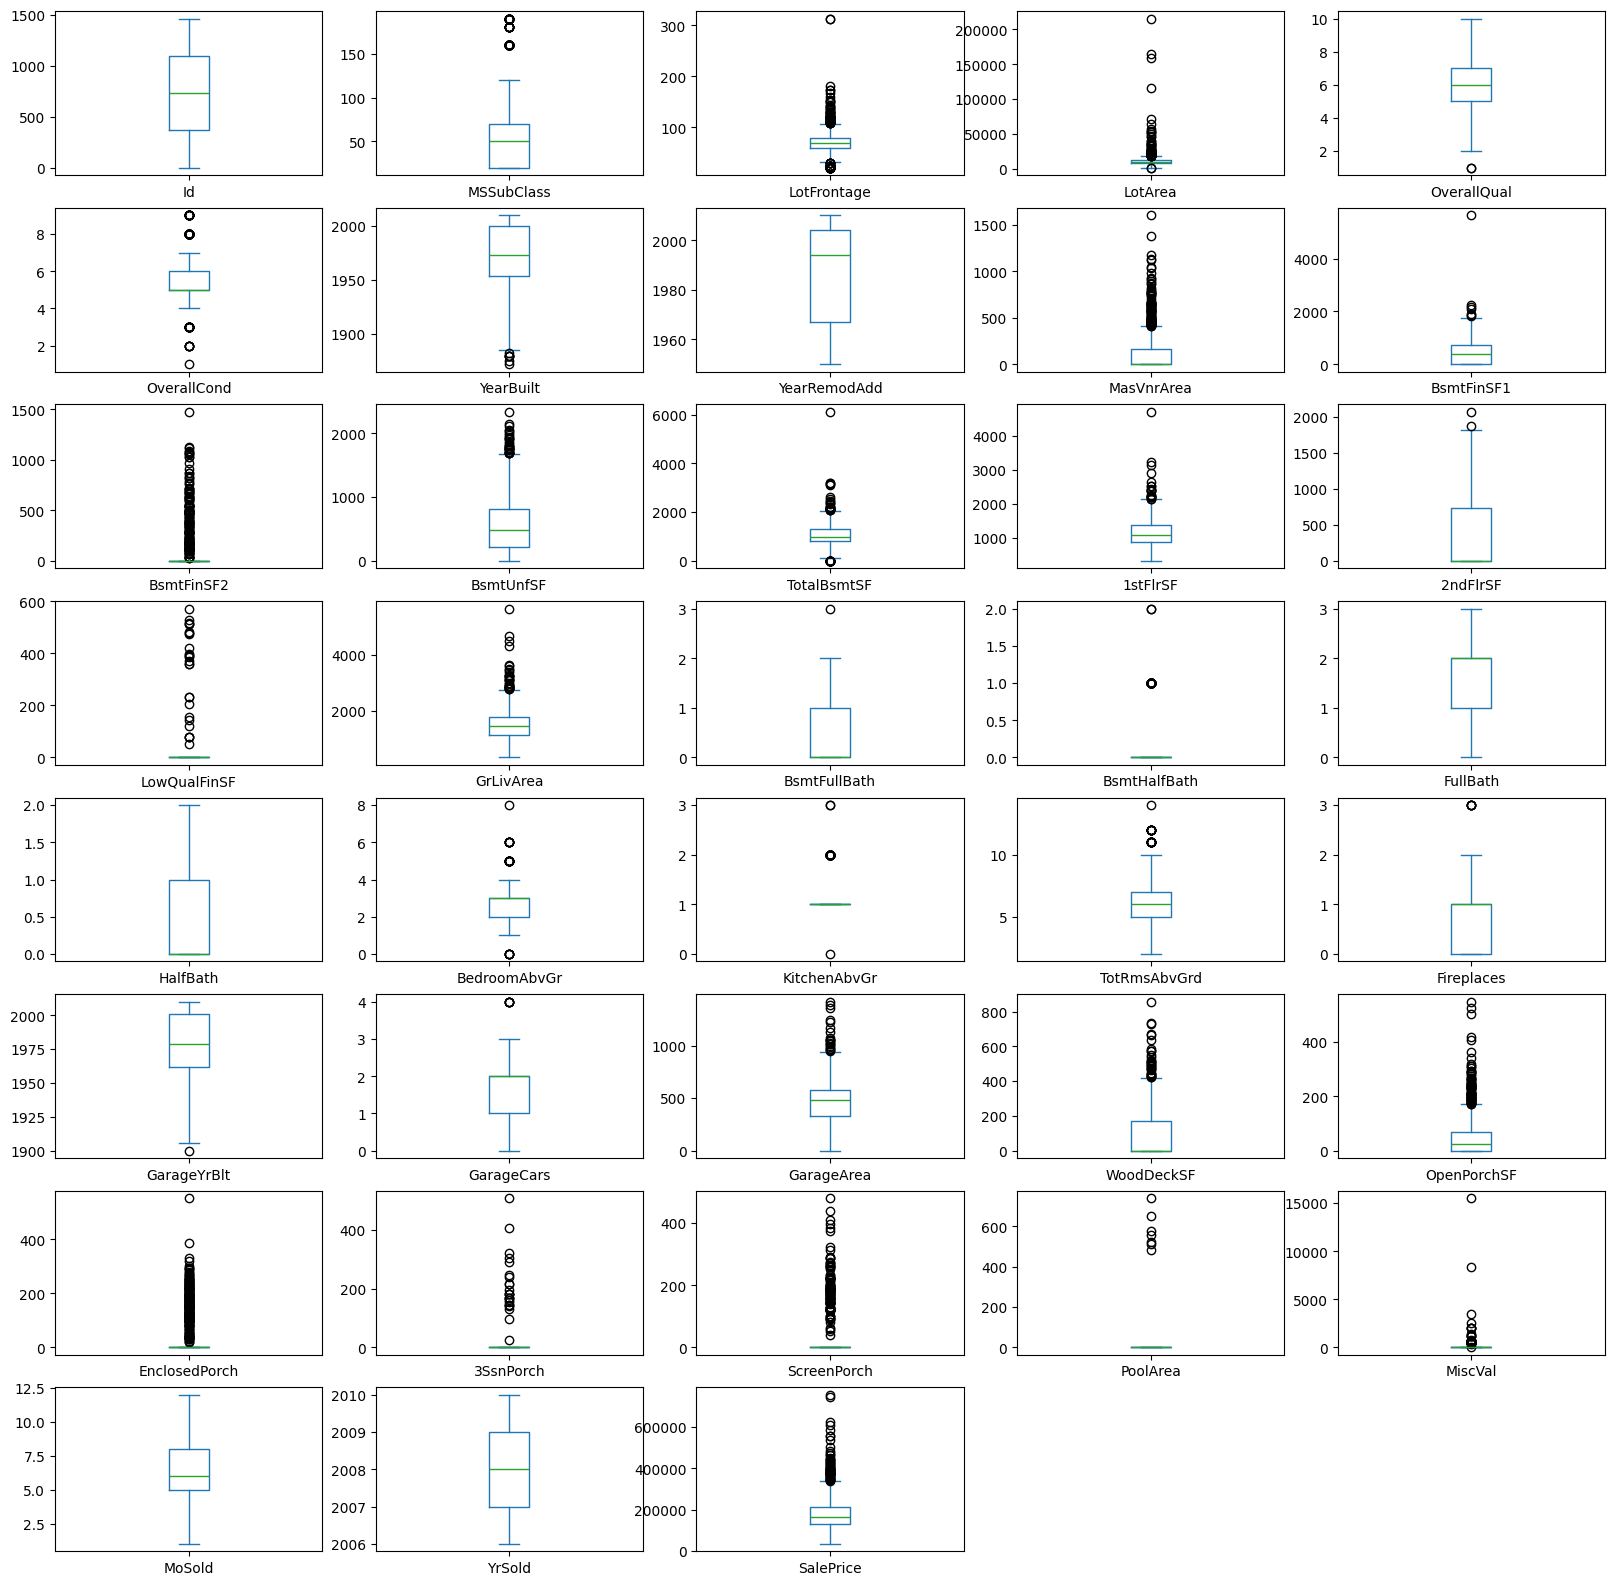

In [15]:
# box plot of all numerical variables to identify outliers
data.plot(kind='box', subplots=True, layout=(8, 5), sharex=False, sharey=False, figsize=(20, 20))

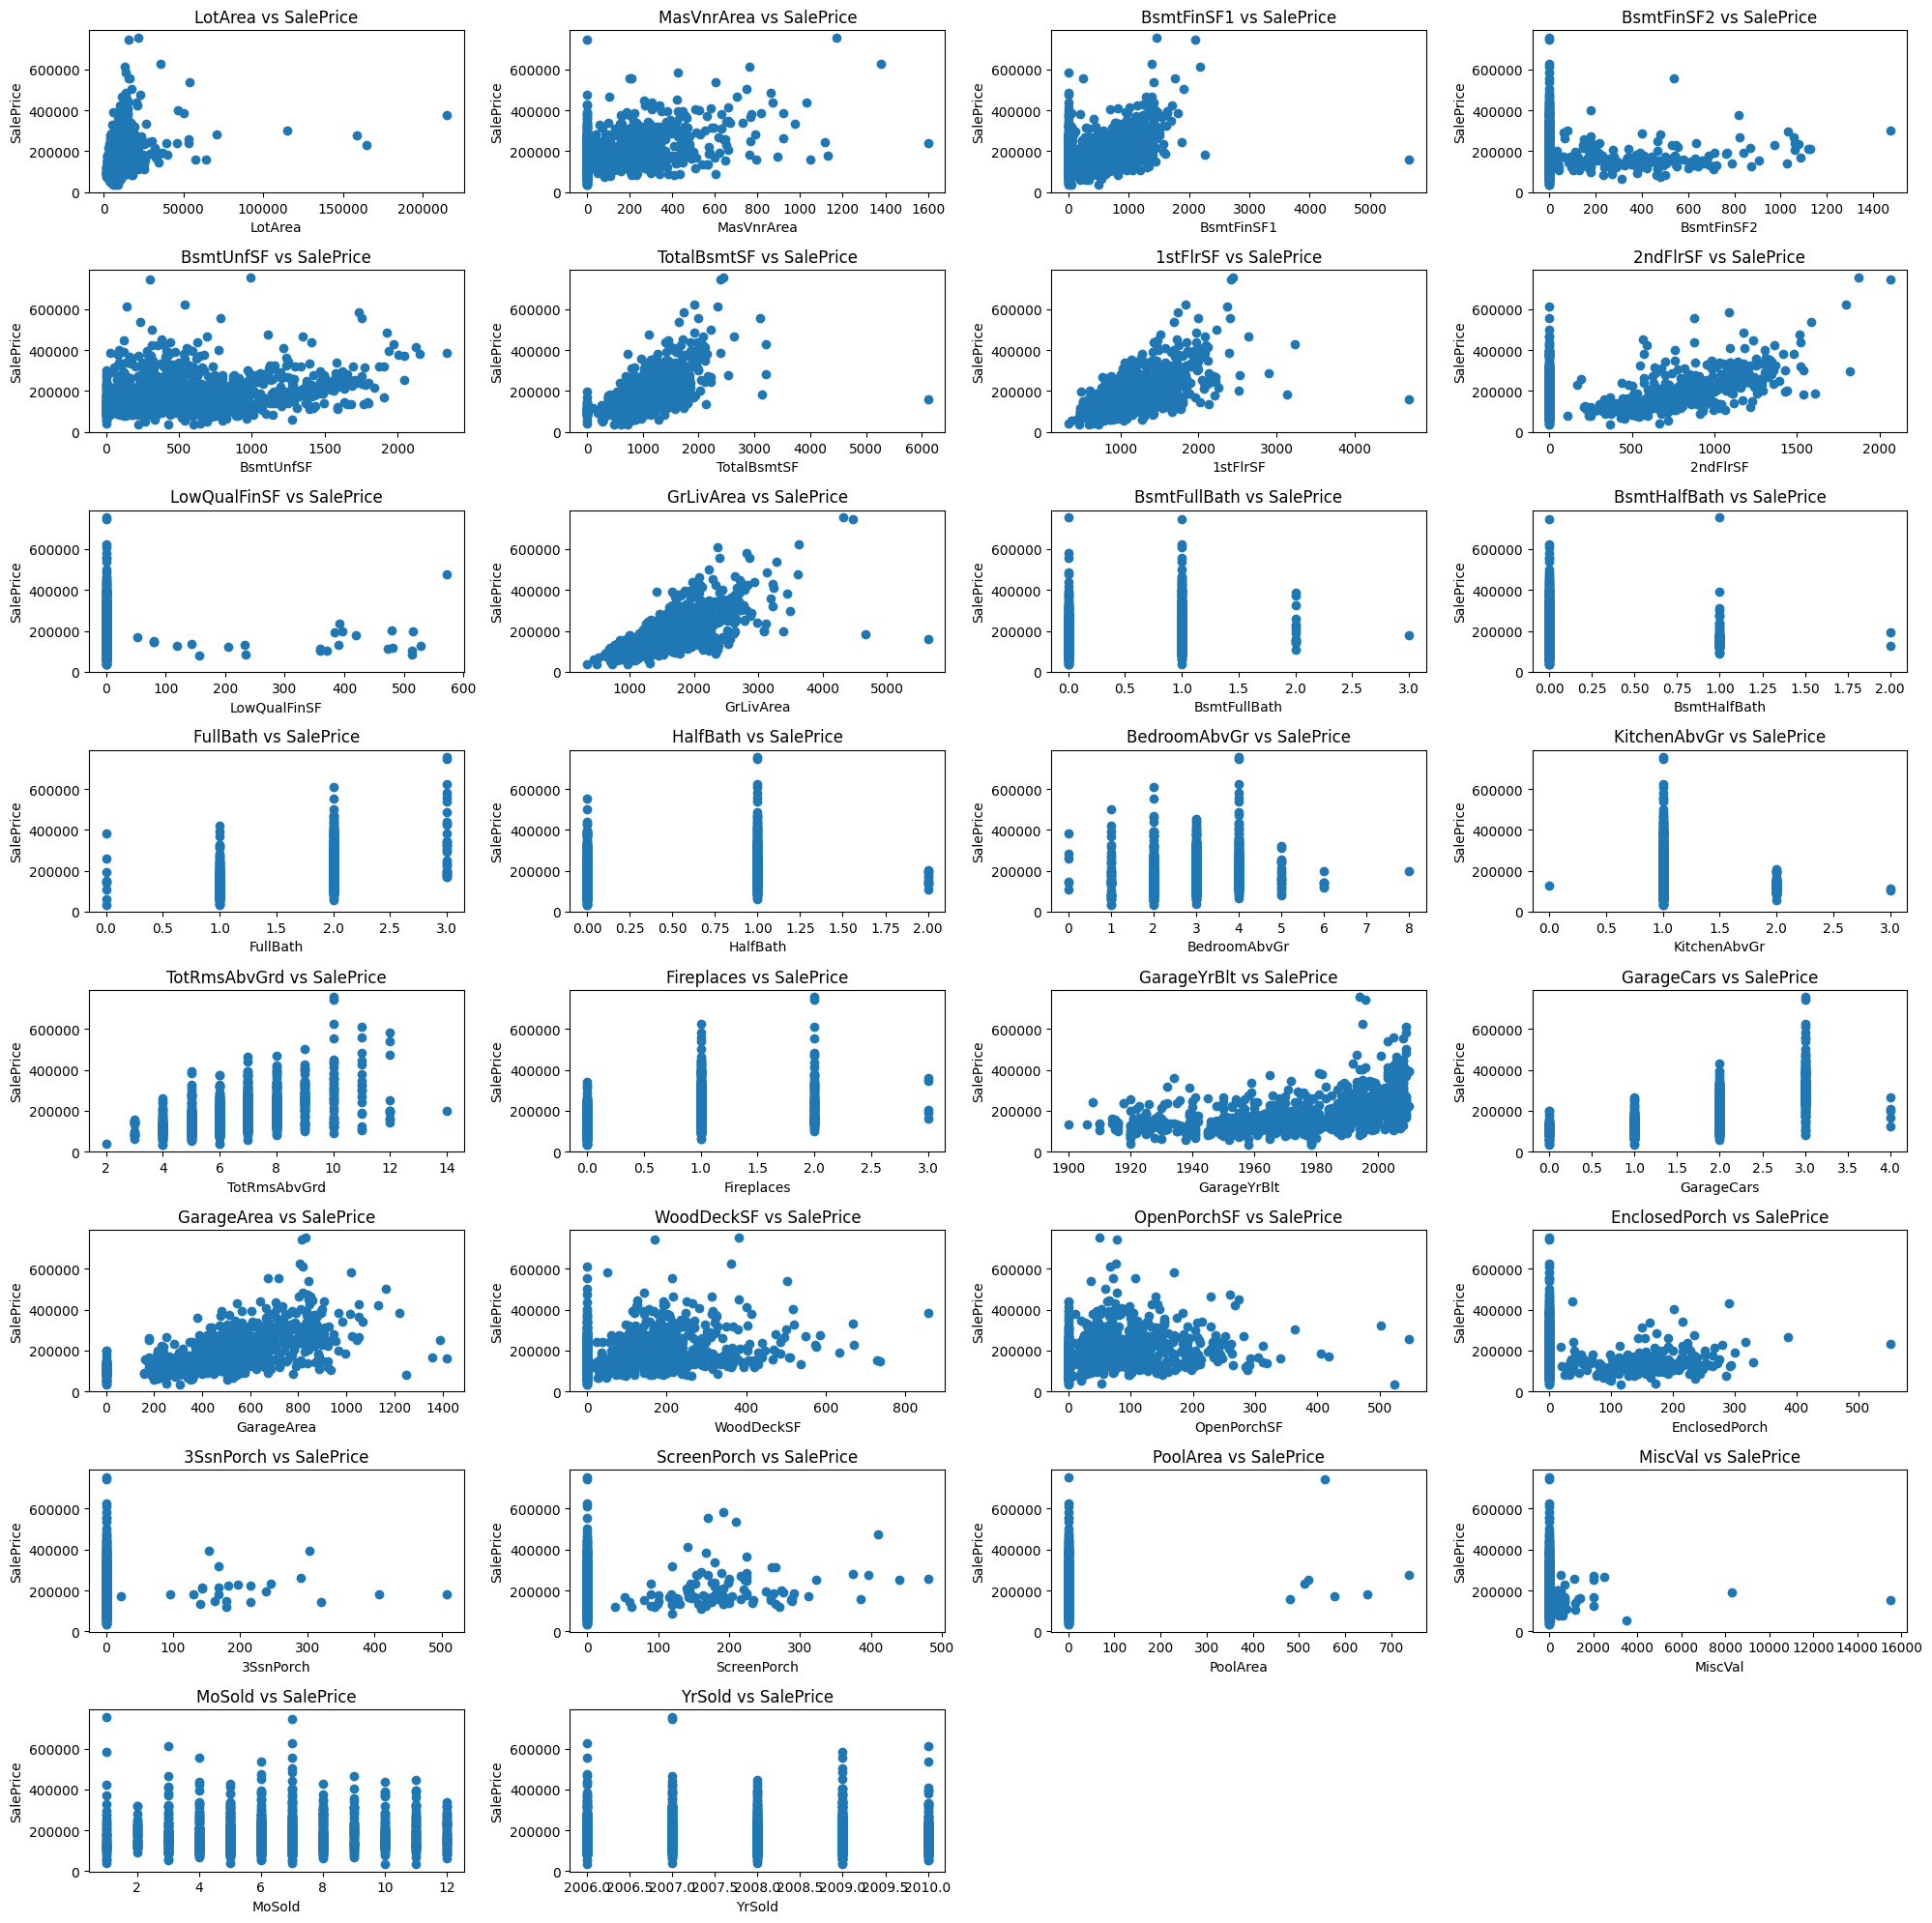

In [16]:
# scatter plot of all numerical variables with SalePrice
columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

# plot a grid of scatter plots of the numerical variables with SalePrice
plt.figure(figsize=(20, 20))
for i in range(1, len(columns)):
    plt.subplot(8, 4, i)
    plt.scatter(data[columns[i]], data['SalePrice'])
    plt.title(columns[i] + ' vs SalePrice')
    plt.xlabel(columns[i])
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

##### 1.4.2 Handling Outliers

In [17]:
# remove the records with BsmtFinSF1 greater than 5000
data = data[data['BsmtFinSF1'] < 5000]

# remove the records with BsmtFinSF2 greater than 1200
data = data[data['BsmtFinSF2'] < 1200]

# remove the records with TotalBsmtSF greater than 6000
data = data[data['TotalBsmtSF'] < 6000]

# remove the records with MiscVal greater than 5000
data = data[data['MiscVal'] < 5000]

#### 1.5 Data Inconsistencies

##### 1.5.1 Identifying Data Inconsistencies

In [18]:
# list the unique values of all categorical variables
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace

# 2. Model Development

## 2.1 Feature Analysis

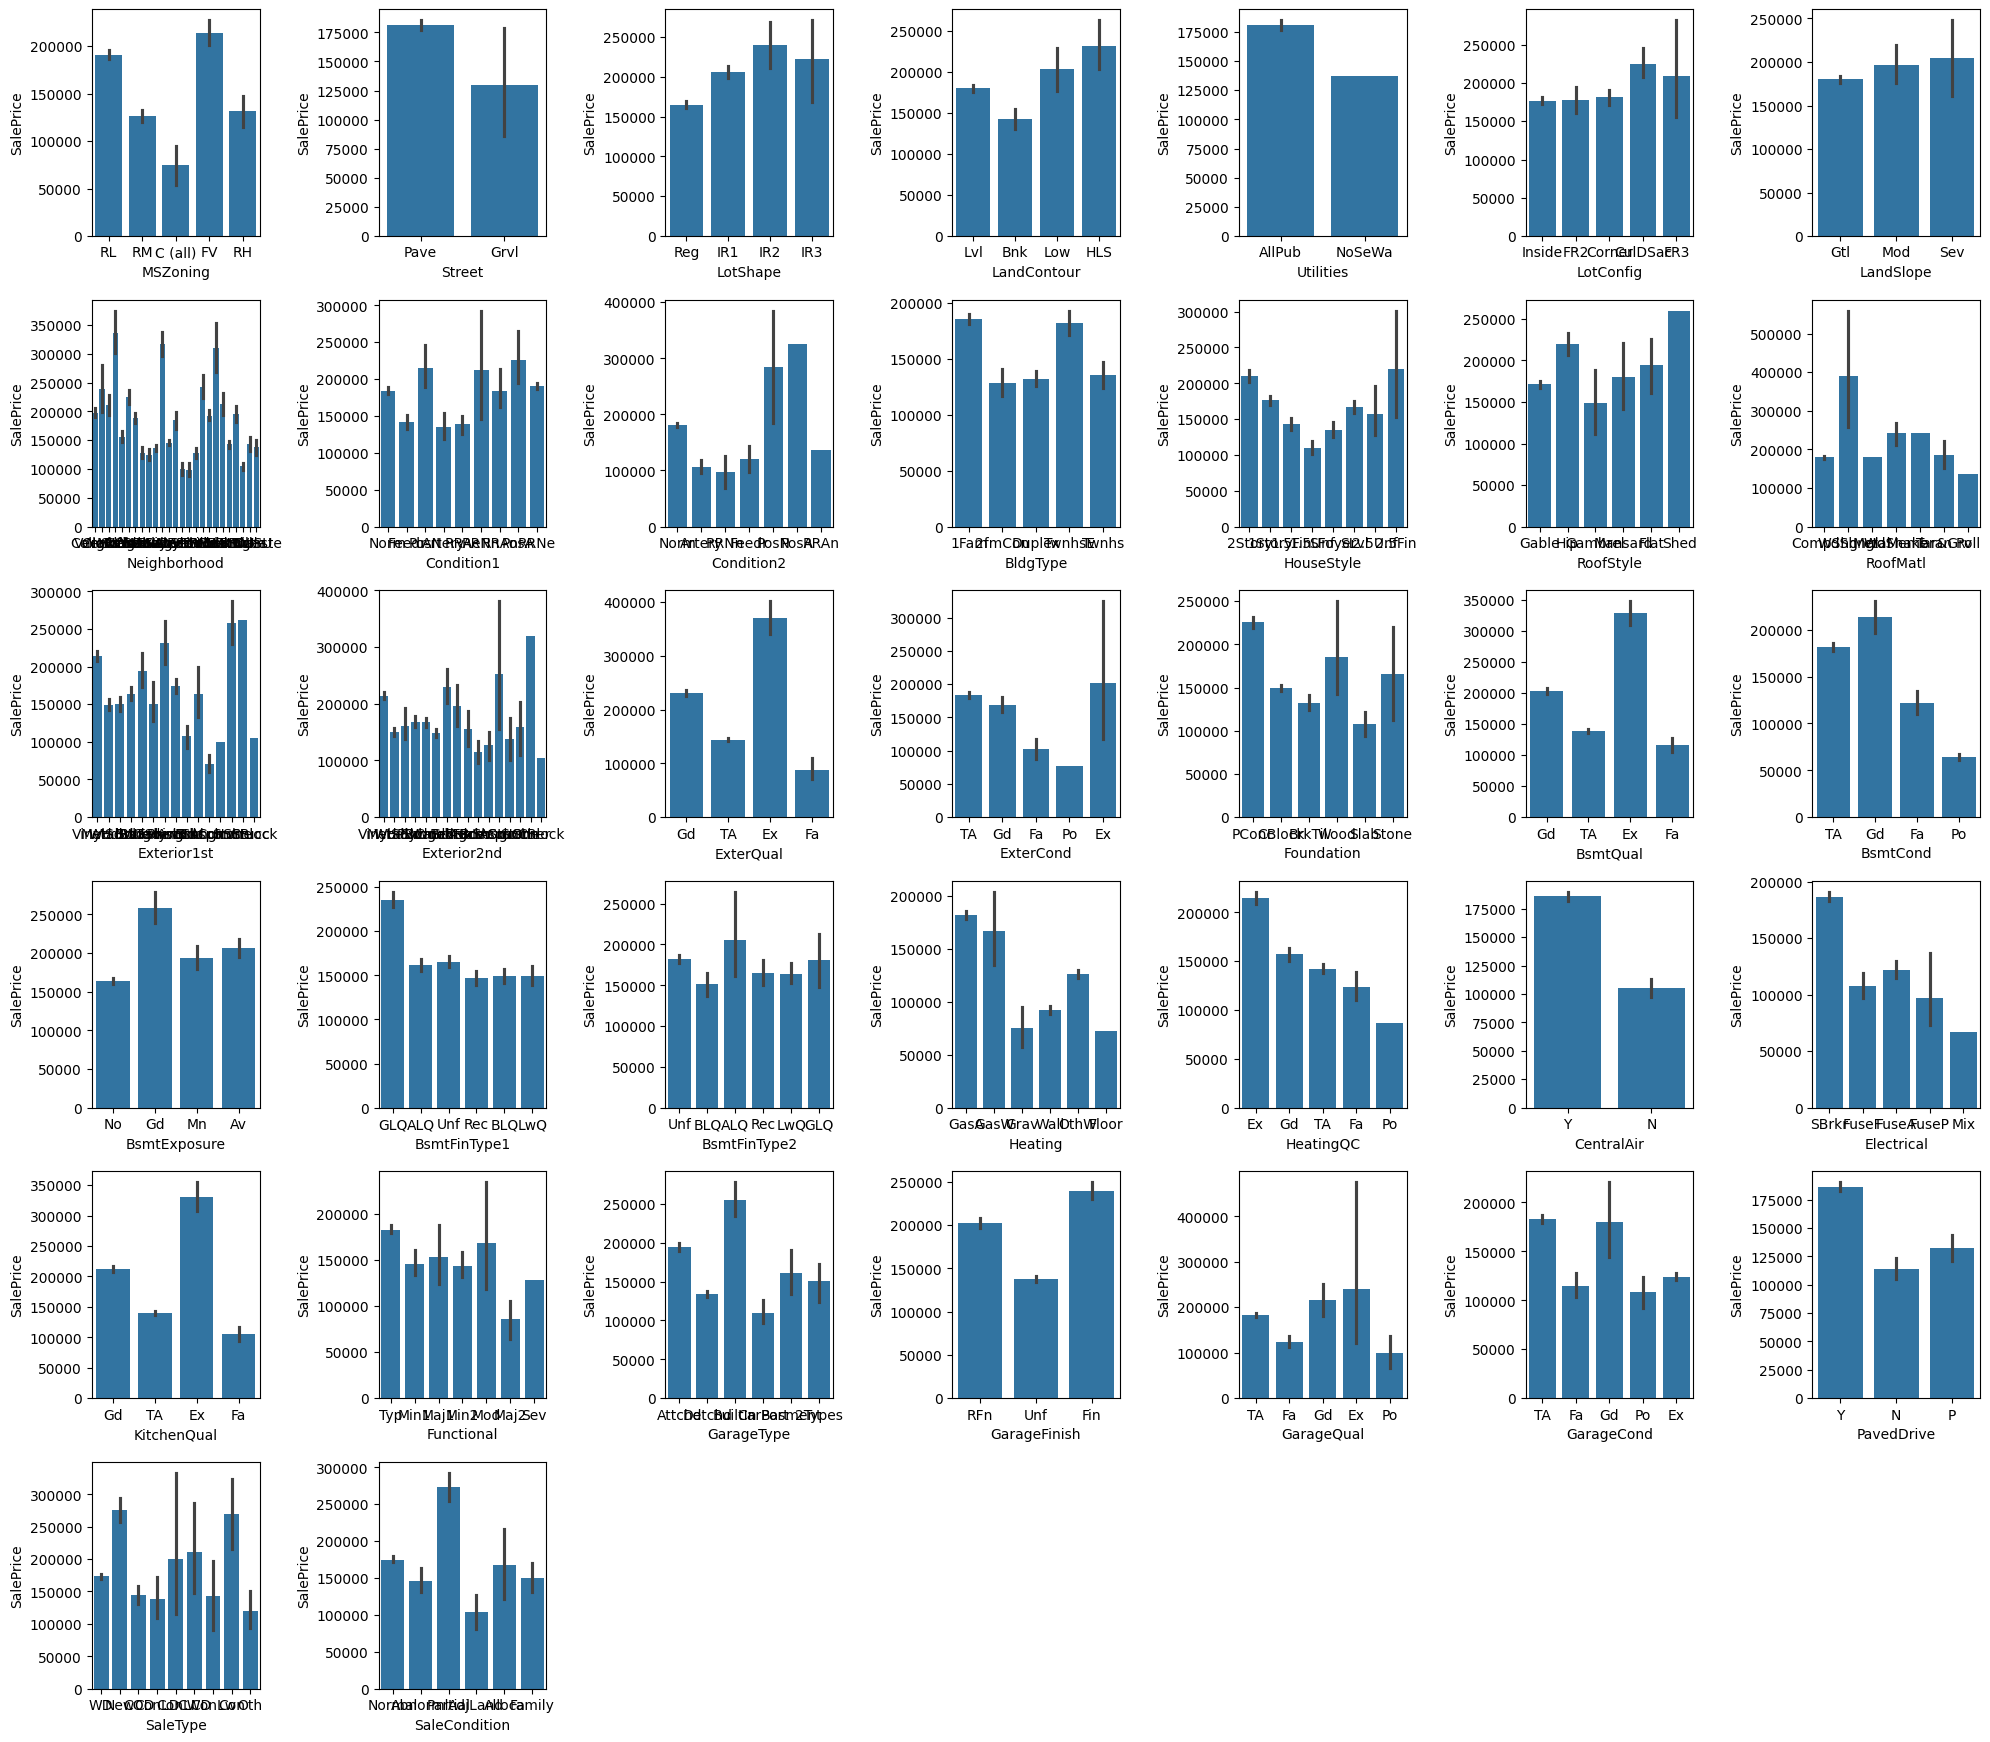

In [19]:
# sns barplot of all categorical variables with SalePrice
plt.figure(figsize=(20, 20))
for i in range(len(categorical_cols)):
    plt.subplot(7, 7, i+1)
    sns.barplot(x=categorical_cols[i], y='SalePrice', data=data)
plt.tight_layout()

In [20]:
# sort the all columns of categorical features by the mean SalePrice
for col in categorical_cols:
    print(data.groupby(col)['SalePrice'].mean().sort_values(ascending=False))

MSZoning
FV         214014.061538
RL         190971.446382
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64
Street
Pave    181076.76069
Grvl    130190.50000
Name: SalePrice, dtype: float64
LotShape
IR2    239833.365854
IR3    222262.777778
IR1    206051.363825
Reg    164754.818378
Name: SalePrice, dtype: float64
LandContour
HLS    231533.940000
Low    203661.111111
Lvl    180105.804281
Bnk    142831.564516
Name: SalePrice, dtype: float64
Utilities
AllPub    180896.870103
NoSeWa    137500.000000
Name: SalePrice, dtype: float64
LotConfig
CulDSac    224632.623656
FR3        208475.000000
Corner     181705.958015
FR2        177934.574468
Inside     176807.453333
Name: SalePrice, dtype: float64
LandSlope
Sev    204379.230769
Mod    196734.138462
Gtl    179896.804790
Name: SalePrice, dtype: float64
Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273


## 2.2 Encoding categorical data

In [21]:
# Initialize an empty dictionary to store mappings
mapping_dicts = {}

# Assuming 'data' is your DataFrame and 'categorical_cols' contains the names of categorical columns
for col in categorical_cols:
    # Calculate mean SalePrice for each category and sort them
    mean_prices = data.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    
    # Create a mapping dictionary based on the sorted order
    mapping_dict = {category: rank + 1 for rank, category in enumerate(mean_prices.index)}
    
    # Apply the mapping to the column
    data[col] = data[col].map(mapping_dict)
    
    # Store the mapping dictionary for future use
    mapping_dicts[col] = mapping_dict

# Now, 'data' has its categorical columns encoded ordinally based on the mean SalePrice
# And 'mapping_dicts' stores the mapping for each categorical colum

In [22]:
data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         2         65.0     8450       1         4   
1   2          20         2         80.0     9600       1         4   
2   3          60         2         68.0    11250       1         3   
3   4          70         2         60.0     9550       1         3   
4   5          60         2         84.0    14260       1         3   

   LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            3          1          5  ...              0          0   
1            3          1          4  ...              0          0   
2            3          1          5  ...              0          0   
3            3          1          3  ...            272          0   
4            3          1          4  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         5              2   
1            0         0        0       5    2007         5              2   
2            0         0        0       9    2008         5              2   
3            0         0        0       2    2006         5              5   
4            0         0        0      12    2008         5              2   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 75 columns]

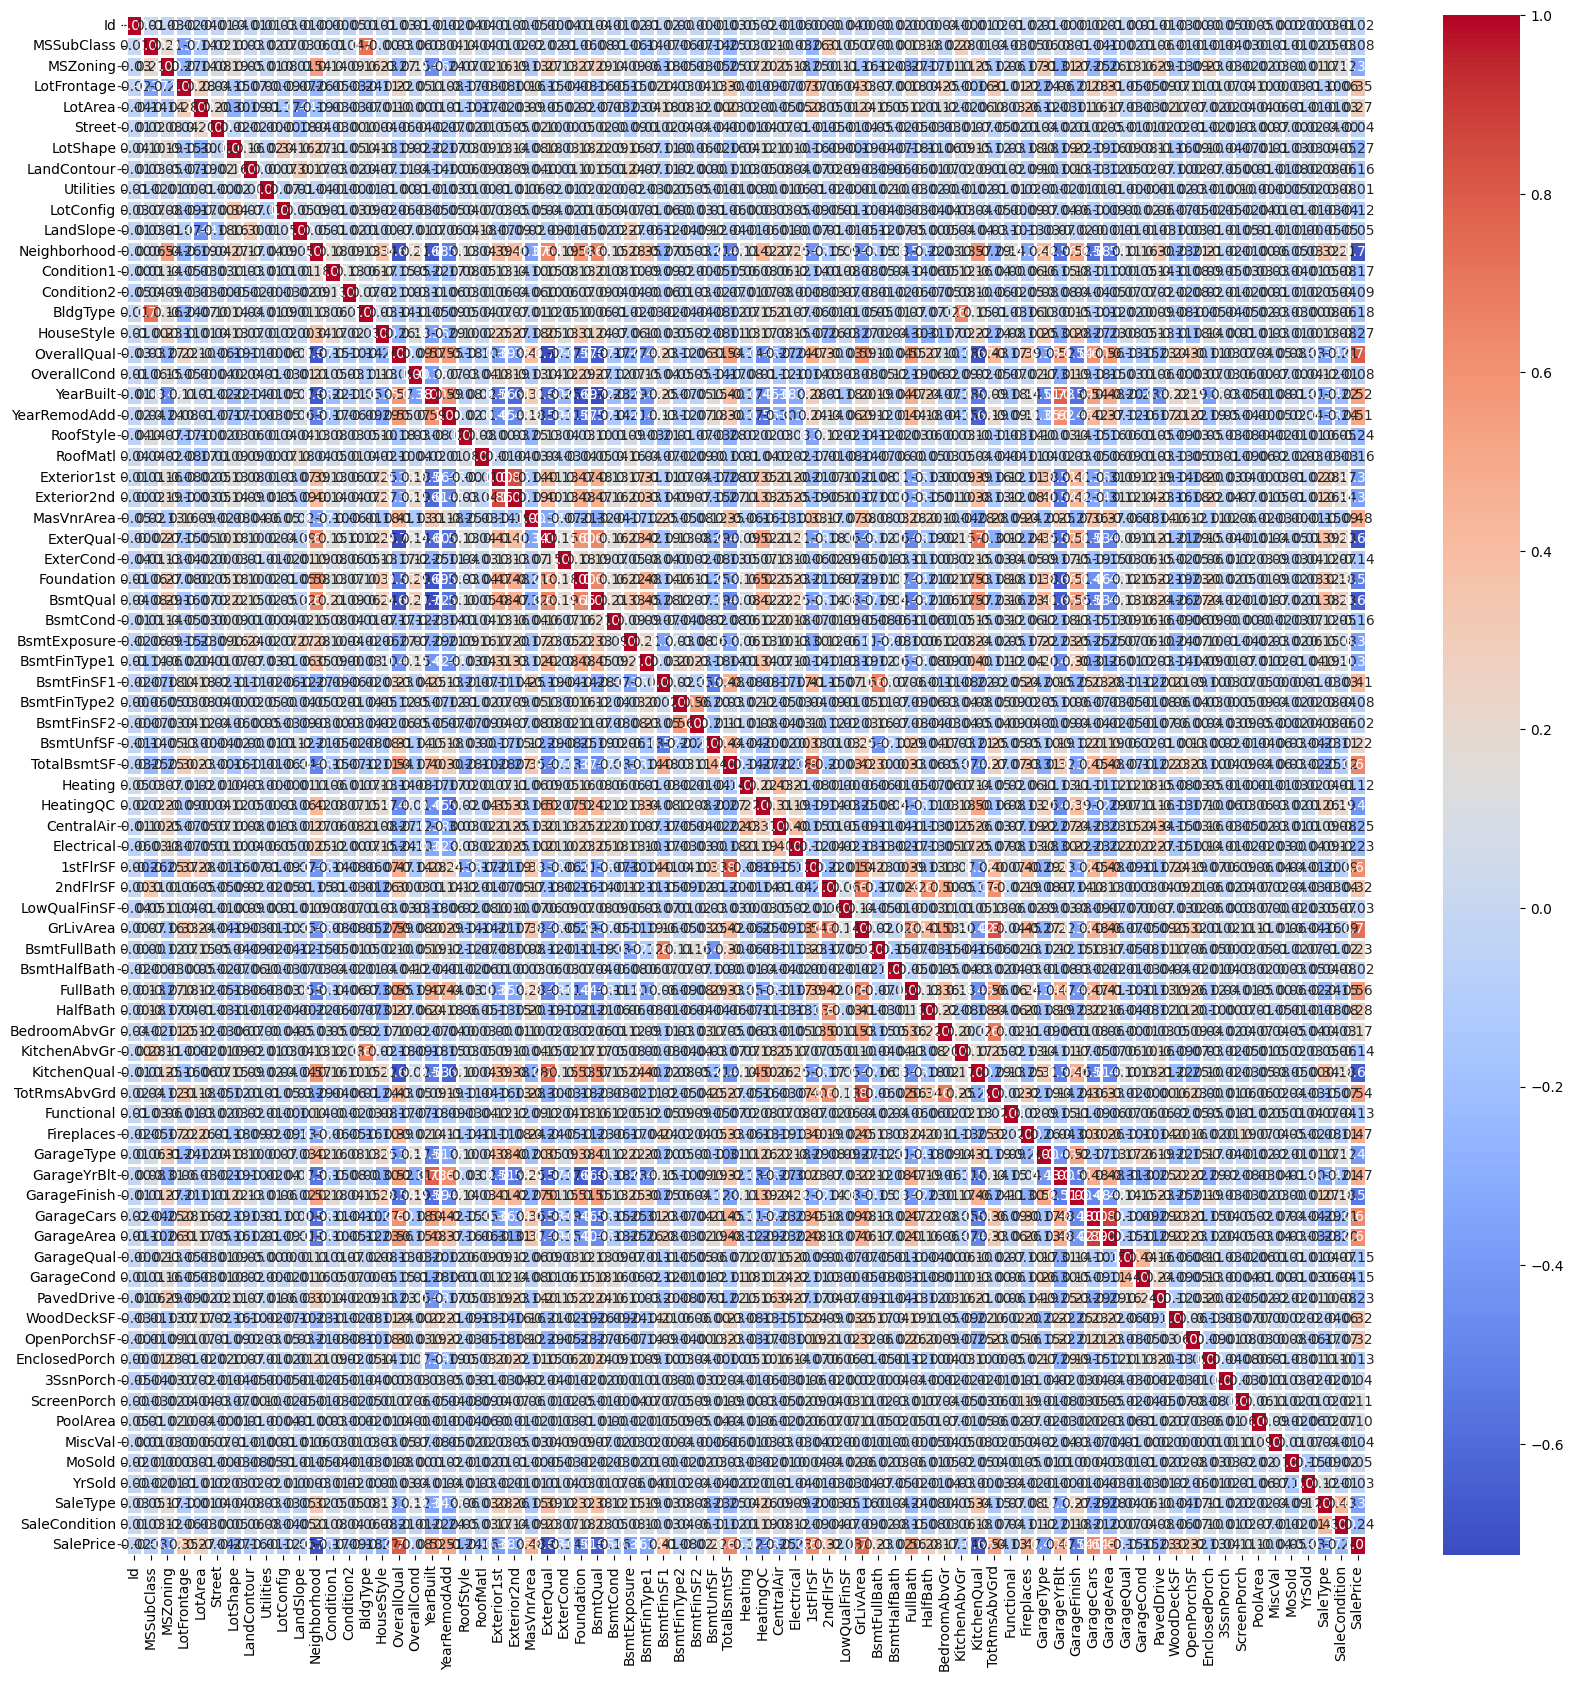

In [23]:
# headmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

## 2.2 Train-test split

In [24]:
data.shape

(1456, 75)

In [25]:
# construct X and y for the model
X = data.drop(['SalePrice', "Id"], axis=1)
y = data['SalePrice']

In [26]:
X.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         2         65.0     8450       1         4            3   
1          20         2         80.0     9600       1         4            3   
2          60         2         68.0    11250       1         3            3   
3          70         2         60.0     9550       1         3            3   
4          60         2         84.0    14260       1         3            3   

   Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0          1          5          3  ...           61              0   
1          1          4          3  ...            0              0   
2          1          5          3  ...           42              0   
3          1          3          3  ...           35            272   
4          1          4          3  ...           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0            0         0        0       2    2008         5   
1          0            0         0        0       5    2007         5   
2          0            0         0        0       9    2008         5   
3          0            0         0        0       2    2006         5   
4          0            0         0        0      12    2008         5   

   SaleCondition  
0              2  
1              2  
2              2  
3              5  
4              2  

[5 rows x 73 columns]

In [27]:
# training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = X_train
X_test_scaled = scaler.transform(X_test)
# X_test_scaled = X_test

## 2.3 Model training and selection

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model_name, model, X_test, y_test):
    try:
        y_pred = model.predict(X_test)
    except AttributeError:  # Handle Keras model predict method
        y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} Mean Absolute Error: {mae}")
    print(f"{model_name} R2 Score: {r2}")
    print()

# Define models with optional parameters
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regressor": SVR(kernel='linear'),
    "K Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100),
    "Ada Boost Regressor": AdaBoostRegressor(n_estimators=50),
    "Bagging Regressor": BaggingRegressor(estimator=DecisionTreeRegressor()),
    "Extra Trees Regressor": ExtraTreesRegressor(n_estimators=100),
    "Voting Regressor": VotingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor()), ('svr', SVR())]),
    "Stacking Regressor": StackingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor()), ('svr', SVR())], final_estimator=RandomForestRegressor()),
    "Lasso Regressor": Lasso(alpha=0.1),
    "Ridge Regressor": Ridge(alpha=0.1),
    "Elastic Net Regressor": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Kernel Ridge Regressor": KernelRidge(alpha=0.1, kernel='rbf'),
    "XGBoost Regressor": XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
}

# Train the models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)


In [30]:
# neoral network model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

neural_network = Sequential()
neural_network.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
neural_network.add(Dropout(0.2))
neural_network.add(Dense(64, activation='relu'))
neural_network.add(Dropout(0.2))
neural_network.add(Dense(32, activation='relu'))
neural_network.add(Dropout(0.2))
neural_network.add(Dense(16, activation='relu'))
neural_network.add(Dropout(0.2))
neural_network.add(Dense(1, activation='linear'))

neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9472      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [31]:
neural_network.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',  metrics=['mae'])

In [32]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

In [33]:
# train the neural network model
neural_network.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping, reduce_lr_on_plateau])

Epoch 1/1000
37/37 [==============================] - 1s 8ms/step - loss: 40528531456.0000 - mae: 183686.6250 - val_loss: 33000194048.0000 - val_mae: 169533.6094 - lr: 0.0010
Epoch 2/1000
37/37 [==============================] - 0s 3ms/step - loss: 40423010304.0000 - mae: 183458.3281 - val_loss: 32740026368.0000 - val_mae: 168915.2031 - lr: 0.0010
Epoch 3/1000
37/37 [==============================] - 0s 3ms/step - loss: 39115132928.0000 - mae: 180778.8438 - val_loss: 30344007680.0000 - val_mae: 163284.4688 - lr: 0.0010
Epoch 4/1000
37/37 [==============================] - 0s 3ms/step - loss: 32088635392.0000 - mae: 165011.2812 - val_loss: 20334262272.0000 - val_mae: 135948.6094 - lr: 0.0010
Epoch 5/1000
37/37 [==============================] - 0s 3ms/step - loss: 15888041984.0000 - mae: 113976.4609 - val_loss: 8038416896.0000 - val_mae: 77019.8281 - lr: 0.0010
Epoch 6/1000
37/37 [==============================] - 0s 4ms/step - loss: 8851515392.0000 - mae: 77846.6016 - val_loss: 5902858

## 2.4 Model Evaluation

In [34]:
# Evaluate the models
for model_name, model in models.items():
    evaluate_model(model_name, model, X_test_scaled, y_test)

Linear Regression Mean Squared Error: 567729094.1384443
Linear Regression Mean Absolute Error: 18438.983550749257
Linear Regression R2 Score: 0.8667370698656071

Random Forest Regressor Mean Squared Error: 475662806.1760881
Random Forest Regressor Mean Absolute Error: 14834.439897260274
Random Forest Regressor R2 Score: 0.888347770157582

Decision Tree Regressor Mean Squared Error: 1293428770.1027398
Decision Tree Regressor Mean Absolute Error: 23826.698630136987
Decision Tree Regressor R2 Score: 0.6963937384861543

Support Vector Regressor Mean Squared Error: 3195216794.6487694
Support Vector Regressor Mean Absolute Error: 40084.948059764145
Support Vector Regressor R2 Score: 0.24998743790699052

K Neighbors Regressor Mean Squared Error: 769052133.7220548
K Neighbors Regressor Mean Absolute Error: 18273.751369863014
K Neighbors Regressor R2 Score: 0.8194805553845438

Gradient Boosting Regressor Mean Squared Error: 463939849.75047535
Gradient Boosting Regressor Mean Absolute Error: 146

In [35]:
# Evaluate the neural network model
evaluate_model("Neural Network", neural_network, X_test_scaled, y_test)

10/10 [==============================] - 0s 1ms/step
Neural Network Mean Squared Error: 691129651.9964447
Neural Network Mean Absolute Error: 18603.196944563355
Neural Network R2 Score: 0.8377712965011597



In [68]:
# since XGBoost Regressor has the best performance, Let's train a variety of XGBoost models with different parameters
xgb_models = { 
    "XGBoost Regressor 1": 
    XGBRegressor(n_estimators=1000, max_depth=5, eta=0.045, subsample=0.7, colsample_bytree=0.3),
    "XGBoost Regressor 2":
    XGBRegressor(n_estimators=1000, max_depth=5, eta=0.045, subsample=0.7, colsample_bytree=0.35),
    "XGBoost Regressor 3":
    XGBRegressor(n_estimators=1000, max_depth=5, eta=0.045, subsample=0.7, colsample_bytree=0.4),
    "XGBoost Regressor 4":
    XGBRegressor(n_estimators=1000, max_depth=5, eta=0.045, subsample=0.7, colsample_bytree=0.25),
    "XGBoost Regressor 5":
    XGBRegressor(n_estimators=1000, max_depth=5, eta=0.045, subsample=0.7, colsample_bytree=0.2),
    "XGBoost Regressor 6":
    XGBRegressor(n_estimators=1000, max_depth=5, eta=0.045, subsample=0.7, colsample_bytree=0.15),
    "XGBoost Regressor 7":
    XGBRegressor(n_estimators=1000, max_depth=5, eta=0.045, subsample=0.7, colsample_bytree=0.1),
}

# Train the XGBoost models
for model_name, model in xgb_models.items():
    model.fit(X_train_scaled, y_train)

In [69]:
# Evaluate the XGBoost models
for model_name, model in xgb_models.items():
    evaluate_model(model_name, model, X_test_scaled, y_test)

XGBoost Regressor 1 Mean Squared Error: 290616619.7357241
XGBoost Regressor 1 Mean Absolute Error: 11962.300634096746
XGBoost Regressor 1 R2 Score: 0.9317836165428162

XGBoost Regressor 2 Mean Squared Error: 323122096.8826456
XGBoost Regressor 2 Mean Absolute Error: 12495.981378424658
XGBoost Regressor 2 R2 Score: 0.9241536259651184

XGBoost Regressor 3 Mean Squared Error: 327022795.6237485
XGBoost Regressor 3 Mean Absolute Error: 12621.894210188357
XGBoost Regressor 3 R2 Score: 0.9232380390167236

XGBoost Regressor 4 Mean Squared Error: 297943268.8411116
XGBoost Regressor 4 Mean Absolute Error: 12294.969900470891
XGBoost Regressor 4 R2 Score: 0.9300638437271118

XGBoost Regressor 5 Mean Squared Error: 328766055.3980406
XGBoost Regressor 5 Mean Absolute Error: 12572.388310680652
XGBoost Regressor 5 R2 Score: 0.9228287935256958

XGBoost Regressor 6 Mean Squared Error: 329167582.62693393
XGBoost Regressor 6 Mean Absolute Error: 12594.792473779966
XGBoost Regressor 6 R2 Score: 0.922734558

# 3. Submission

## 3.1 Data Processing

In [36]:
# load the test data
test_data = pd.read_csv('data\\test.csv')
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

### 3.1.1 Missing Values

In [37]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [38]:
# drop the column with missing values more than 45%
test_data = test_data.dropna(axis=1, thresh=int(0.55*test_data.shape[0]))

In [39]:
# display the categorical columns with missing values
test_data.select_dtypes(include='object').isnull().sum()[test_data.select_dtypes(include='object').isnull().sum() > 0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [40]:
# impute the missing values in the categorical columns with the mode
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['Utilities'] = test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtQual'] = test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['BsmtCond'] = test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Functional'] = test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['GarageType'] = test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish'] = test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual'] = test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond'] = test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['SaleType'] = test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])

In [41]:
# display the numerical columns with missing values
test_data.select_dtypes(exclude='object').isnull().sum()[test_data.select_dtypes(exclude='object').isnull().sum() > 0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [42]:
# replace missing values in LotFrontage with the mean
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtFinSF2'] = test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['BsmtUnfSF'] = test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mean())
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mean())
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())
test_data['GarageCars'] = test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea'] = test_data['GarageArea'].fillna(test_data['GarageArea'].mean())

In [43]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

### 3.1.2 Encoding

In [44]:
mapping_dicts

{'MSZoning': {'FV': 1, 'RL': 2, 'RH': 3, 'RM': 4, 'C (all)': 5},
 'Street': {'Pave': 1, 'Grvl': 2},
 'LotShape': {'IR2': 1, 'IR3': 2, 'IR1': 3, 'Reg': 4},
 'LandContour': {'HLS': 1, 'Low': 2, 'Lvl': 3, 'Bnk': 4},
 'Utilities': {'AllPub': 1, 'NoSeWa': 2},
 'LotConfig': {'CulDSac': 1, 'FR3': 2, 'Corner': 3, 'FR2': 4, 'Inside': 5},
 'LandSlope': {'Sev': 1, 'Mod': 2, 'Gtl': 3},
 'Neighborhood': {'NoRidge': 1,
  'NridgHt': 2,
  'StoneBr': 3,
  'Timber': 4,
  'Veenker': 5,
  'Somerst': 6,
  'ClearCr': 7,
  'Crawfor': 8,
  'CollgCr': 9,
  'Blmngtn': 10,
  'Gilbert': 11,
  'NWAmes': 12,
  'SawyerW': 13,
  'Mitchel': 14,
  'NAmes': 15,
  'NPkVill': 16,
  'SWISU': 17,
  'Blueste': 18,
  'Sawyer': 19,
  'OldTown': 20,
  'Edwards': 21,
  'BrkSide': 22,
  'BrDale': 23,
  'IDOTRR': 24,
  'MeadowV': 25},
 'Condition1': {'PosA': 1,
  'PosN': 2,
  'RRNn': 3,
  'RRNe': 4,
  'Norm': 5,
  'RRAn': 6,
  'Feedr': 7,
  'RRAe': 8,
  'Artery': 9},
 'Condition2': {'PosA': 1,
  'PosN': 2,
  'Norm': 3,
  'RRAn': 4

In [45]:
# Ecnode the categorical variables with the mapping dictionary created earlier for the training data
for col in categorical_cols:
    if col in mapping_dicts:
        # Apply the stored mapping to the new data
        test_data[col] = test_data[col].map(mapping_dicts[col])
    else:
        # Handle cases where the column does not exist in the new data or was not present during training
        pass

test_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  1461          20         3         80.0    11622       1         4   
1  1462          20         2         81.0    14267       1         3   
2  1463          60         2         74.0    13830       1         3   
3  1464          60         2         78.0     9978       1         3   
4  1465         120         2         43.0     5005       1         3   

   LandContour  Utilities  LotConfig  ...  OpenPorchSF  EnclosedPorch  \
0            3          1          5  ...            0              0   
1            3          1          3  ...           36              0   
2            3          1          5  ...           34              0   
3            3          1          5  ...           36              0   
4            1          1          5  ...           82              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0          120         0        0       6    2010         5   
1          0            0         0    12500       6    2010         5   
2          0            0         0        0       3    2010         5   
3          0            0         0        0       6    2010         5   
4          0          144         0        0       1    2010         5   

   SaleCondition  
0              2  
1              2  
2              2  
3              2  
4              2  

[5 rows x 74 columns]

In [46]:
X_test_data = test_data.drop('Id', axis=1)

In [47]:
X_test_data.shape

(1459, 73)

In [48]:
# normalize the test data
X_test_data_scaled = scaler.transform(X_test_data)
# X_test_data_scaled = X_test_data

In [70]:
# make predictions on the test data using the XGBoost Regressor
y_pred = xgb_models['XGBoost Regressor 1'].predict(X_test_data_scaled)
y_pred

array([132526.31, 162598.42, 187279.38, ..., 163386.64, 113708.19,
       218575.28], dtype=float32)

In [71]:
# create a DataFrame with the Id and SalePrice
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred})
submission.head()

Id      SalePrice
0  1461  132526.312500
1  1462  162598.421875
2  1463  187279.375000
3  1464  199769.703125
4  1465  176811.328125

In [72]:
# save the submission DataFrame to a csv file
submission.to_csv('submission.csv', index=False)